# 时间序列分析预测

## 时间序列常见的主要有三类
- 时间戳(timestamp)
- 固定周期(period)
- 时间间隔(interval)

## date_range
- 可以指定开始时间与周期
- H:小时
- D: 天
- M: 月

In [1]:
import pandas as pd
import numpy as np

In [9]:
# TIMES #2016 Jul 1 7/1/2016  1/7/2016 2016-07-01 2016/07/01
rng = pd.date_range('2016/07/01',periods=10, freq='3D')
rng

DatetimeIndex(['2016-07-01', '2016-07-04', '2016-07-07', '2016-07-10',
               '2016-07-13', '2016-07-16', '2016-07-19', '2016-07-22',
               '2016-07-25', '2016-07-28'],
              dtype='datetime64[ns]', freq='3D')

In [5]:
time = pd.Series(np.random.randn(20), index=pd.date_range(pd.datetime(2016,1,1),periods=20))
print(time)

2016-01-01   -0.295082
2016-01-02   -1.466282
2016-01-03   -1.565906
2016-01-04    0.287160
2016-01-05    0.303060
2016-01-06   -1.656336
2016-01-07   -0.332196
2016-01-08    0.159558
2016-01-09    1.682851
2016-01-10   -0.176681
2016-01-11    0.961318
2016-01-12    2.436154
2016-01-13    0.697507
2016-01-14    1.262342
2016-01-15   -0.361066
2016-01-16    0.692581
2016-01-17    0.470911
2016-01-18   -1.804268
2016-01-19   -0.011344
2016-01-20    1.039211
Freq: D, dtype: float64


In [10]:
print(time['2016-01-15'])

-0.3610658367122751


In [12]:
print(time['2016-01-15':'2016-01-20'])

2016-01-15   -0.361066
2016-01-16    0.692581
2016-01-17    0.470911
2016-01-18   -1.804268
2016-01-19   -0.011344
2016-01-20    1.039211
Freq: D, dtype: float64


# truncate 过来

In [13]:
time.truncate(before='2016-1-10')

2016-01-10   -0.176681
2016-01-11    0.961318
2016-01-12    2.436154
2016-01-13    0.697507
2016-01-14    1.262342
2016-01-15   -0.361066
2016-01-16    0.692581
2016-01-17    0.470911
2016-01-18   -1.804268
2016-01-19   -0.011344
2016-01-20    1.039211
Freq: D, dtype: float64

In [14]:
pd.Timestamp('2016-07-10')

Timestamp('2016-07-10 00:00:00')

In [15]:
pd.Timestamp('2016-07-10 19')

Timestamp('2016-07-10 19:00:00')

In [16]:
pd.Timedelta('1 day')

Timedelta('1 days 00:00:00')

In [17]:
pd.Period('2016-01-10 10:10') + pd.Timedelta('1 day')

Period('2016-01-11 10:10', 'T')

In [18]:
p1 = pd.period_range('2016-01-01 10:10',freq='25H',periods=10)

In [19]:
p2 = pd.period_range('2016-01-01 10:10',freq='1D1H',periods=10)

In [20]:
p1

PeriodIndex(['2016-01-01 10:00', '2016-01-02 11:00', '2016-01-03 12:00',
             '2016-01-04 13:00', '2016-01-05 14:00', '2016-01-06 15:00',
             '2016-01-07 16:00', '2016-01-08 17:00', '2016-01-09 18:00',
             '2016-01-10 19:00'],
            dtype='period[25H]', freq='25H')

In [21]:
ts = pd.Series(range(10), pd.date_range('07-10-16 8:00', periods=10, freq='H'))
ts

2016-07-10 08:00:00    0
2016-07-10 09:00:00    1
2016-07-10 10:00:00    2
2016-07-10 11:00:00    3
2016-07-10 12:00:00    4
2016-07-10 13:00:00    5
2016-07-10 14:00:00    6
2016-07-10 15:00:00    7
2016-07-10 16:00:00    8
2016-07-10 17:00:00    9
Freq: H, dtype: int64

In [22]:
ts.to_period()

2016-07-10 08:00    0
2016-07-10 09:00    1
2016-07-10 10:00    2
2016-07-10 11:00    3
2016-07-10 12:00    4
2016-07-10 13:00    5
2016-07-10 14:00    6
2016-07-10 15:00    7
2016-07-10 16:00    8
2016-07-10 17:00    9
Freq: H, dtype: int64

In [23]:
type(ts.index)

pandas.core.indexes.datetimes.DatetimeIndex

In [25]:
ts_period = ts.to_period()
ts_period

2016-07-10 08:00    0
2016-07-10 09:00    1
2016-07-10 10:00    2
2016-07-10 11:00    3
2016-07-10 12:00    4
2016-07-10 13:00    5
2016-07-10 14:00    6
2016-07-10 15:00    7
2016-07-10 16:00    8
2016-07-10 17:00    9
Freq: H, dtype: int64

## 数据重采样
- 时间数据由一个频率转换到另一个频率
- 降采样
- 升采样

In [26]:
rng = pd.date_range('1/1/2011',periods=90, freq='D')
ts = pd.Series(np.random.randn(len(rng)),index=rng)
ts.head()

2011-01-01   -0.338629
2011-01-02    1.018697
2011-01-03   -0.429332
2011-01-04   -1.360184
2011-01-05   -0.565838
Freq: D, dtype: float64

In [27]:
ts.resample('M').sum()

2011-01-31   -10.067391
2011-02-28    -9.325605
2011-03-31    -9.244100
Freq: M, dtype: float64

In [30]:
day3Ts = ts.resample('3D').mean()

In [31]:
print(day3Ts.resample('D').asfreq())

2011-01-01    0.083579
2011-01-02         NaN
2011-01-03         NaN
2011-01-04   -1.193280
2011-01-05         NaN
2011-01-06         NaN
2011-01-07   -0.352217
2011-01-08         NaN
2011-01-09         NaN
2011-01-10    0.405149
2011-01-11         NaN
2011-01-12         NaN
2011-01-13   -1.026860
2011-01-14         NaN
2011-01-15         NaN
2011-01-16    0.013671
2011-01-17         NaN
2011-01-18         NaN
2011-01-19   -0.121115
2011-01-20         NaN
2011-01-21         NaN
2011-01-22   -0.310761
2011-01-23         NaN
2011-01-24         NaN
2011-01-25   -0.644026
2011-01-26         NaN
2011-01-27         NaN
2011-01-28   -0.242995
2011-01-29         NaN
2011-01-30         NaN
                ...   
2011-02-28         NaN
2011-03-01         NaN
2011-03-02   -0.431489
2011-03-03         NaN
2011-03-04         NaN
2011-03-05   -0.080627
2011-03-06         NaN
2011-03-07         NaN
2011-03-08   -0.426764
2011-03-09         NaN
2011-03-10         NaN
2011-03-11   -0.007473
2011-03-12 

## 插值方法
- ffill 空值取前面的值
- bfill 空值取后面的值
- interpolate 线性取值

In [33]:
day3Ts.resample('D').ffill(2)

2011-01-01    0.083579
2011-01-02    0.083579
2011-01-03    0.083579
2011-01-04   -1.193280
2011-01-05   -1.193280
2011-01-06   -1.193280
2011-01-07   -0.352217
2011-01-08   -0.352217
2011-01-09   -0.352217
2011-01-10    0.405149
2011-01-11    0.405149
2011-01-12    0.405149
2011-01-13   -1.026860
2011-01-14   -1.026860
2011-01-15   -1.026860
2011-01-16    0.013671
2011-01-17    0.013671
2011-01-18    0.013671
2011-01-19   -0.121115
2011-01-20   -0.121115
2011-01-21   -0.121115
2011-01-22   -0.310761
2011-01-23   -0.310761
2011-01-24   -0.310761
2011-01-25   -0.644026
2011-01-26   -0.644026
2011-01-27   -0.644026
2011-01-28   -0.242995
2011-01-29   -0.242995
2011-01-30   -0.242995
                ...   
2011-02-28    0.865435
2011-03-01    0.865435
2011-03-02   -0.431489
2011-03-03   -0.431489
2011-03-04   -0.431489
2011-03-05   -0.080627
2011-03-06   -0.080627
2011-03-07   -0.080627
2011-03-08   -0.426764
2011-03-09   -0.426764
2011-03-10   -0.426764
2011-03-11   -0.007473
2011-03-12 

In [34]:
day3Ts.resample('D').bfill(1)

2011-01-01    0.083579
2011-01-02         NaN
2011-01-03   -1.193280
2011-01-04   -1.193280
2011-01-05         NaN
2011-01-06   -0.352217
2011-01-07   -0.352217
2011-01-08         NaN
2011-01-09    0.405149
2011-01-10    0.405149
2011-01-11         NaN
2011-01-12   -1.026860
2011-01-13   -1.026860
2011-01-14         NaN
2011-01-15    0.013671
2011-01-16    0.013671
2011-01-17         NaN
2011-01-18   -0.121115
2011-01-19   -0.121115
2011-01-20         NaN
2011-01-21   -0.310761
2011-01-22   -0.310761
2011-01-23         NaN
2011-01-24   -0.644026
2011-01-25   -0.644026
2011-01-26         NaN
2011-01-27   -0.242995
2011-01-28   -0.242995
2011-01-29         NaN
2011-01-30   -0.881379
                ...   
2011-02-28         NaN
2011-03-01   -0.431489
2011-03-02   -0.431489
2011-03-03         NaN
2011-03-04   -0.080627
2011-03-05   -0.080627
2011-03-06         NaN
2011-03-07   -0.426764
2011-03-08   -0.426764
2011-03-09         NaN
2011-03-10   -0.007473
2011-03-11   -0.007473
2011-03-12 

In [35]:
day3Ts.resample('D').interpolate('linear')

2011-01-01    0.083579
2011-01-02   -0.342041
2011-01-03   -0.767661
2011-01-04   -1.193280
2011-01-05   -0.912926
2011-01-06   -0.632572
2011-01-07   -0.352217
2011-01-08   -0.099762
2011-01-09    0.152693
2011-01-10    0.405149
2011-01-11   -0.072188
2011-01-12   -0.549524
2011-01-13   -1.026860
2011-01-14   -0.680017
2011-01-15   -0.333173
2011-01-16    0.013671
2011-01-17   -0.031258
2011-01-18   -0.076186
2011-01-19   -0.121115
2011-01-20   -0.184330
2011-01-21   -0.247546
2011-01-22   -0.310761
2011-01-23   -0.421849
2011-01-24   -0.532938
2011-01-25   -0.644026
2011-01-26   -0.510349
2011-01-27   -0.376672
2011-01-28   -0.242995
2011-01-29   -0.455790
2011-01-30   -0.668584
                ...   
2011-02-28    0.433127
2011-03-01    0.000819
2011-03-02   -0.431489
2011-03-03   -0.314535
2011-03-04   -0.197581
2011-03-05   -0.080627
2011-03-06   -0.196006
2011-03-07   -0.311385
2011-03-08   -0.426764
2011-03-09   -0.287000
2011-03-10   -0.147237
2011-03-11   -0.007473
2011-03-12 

# Moving Window Functions

In [36]:
%matplotlib inline
import matplotlib.pylab
import numpy as np
import pandas as pd

In [37]:
df = pd.Series(np.random.randn(600),index=pd.date_range('7/1/2016',freq='D',periods=600))

In [38]:
df.head()

2016-07-01   -0.580977
2016-07-02   -0.761419
2016-07-03   -0.559187
2016-07-04   -2.032190
2016-07-05   -0.802049
Freq: D, dtype: float64

In [40]:
r = df.rolling(window=10)
r

Rolling [window=10,center=False,axis=0]

In [41]:
# r.max, r.median, r.std,r.skew,r.sum,r.var
print(r.mean())

2016-07-01         NaN
2016-07-02         NaN
2016-07-03         NaN
2016-07-04         NaN
2016-07-05         NaN
2016-07-06         NaN
2016-07-07         NaN
2016-07-08         NaN
2016-07-09         NaN
2016-07-10   -0.279312
2016-07-11   -0.226497
2016-07-12   -0.190428
2016-07-13   -0.126741
2016-07-14    0.224064
2016-07-15    0.298334
2016-07-16   -0.052033
2016-07-17   -0.003225
2016-07-18   -0.228070
2016-07-19   -0.019048
2016-07-20   -0.036591
2016-07-21    0.088620
2016-07-22    0.129877
2016-07-23   -0.026002
2016-07-24   -0.078131
2016-07-25   -0.032467
2016-07-26   -0.001142
2016-07-27    0.027005
2016-07-28    0.174567
2016-07-29    0.353358
2016-07-30    0.412360
                ...   
2018-01-22   -0.182337
2018-01-23    0.214724
2018-01-24   -0.036834
2018-01-25   -0.149625
2018-01-26   -0.107219
2018-01-27   -0.174545
2018-01-28   -0.097174
2018-01-29   -0.168136
2018-01-30   -0.241187
2018-01-31   -0.035664
2018-02-01    0.011216
2018-02-02   -0.252217
2018-02-03 

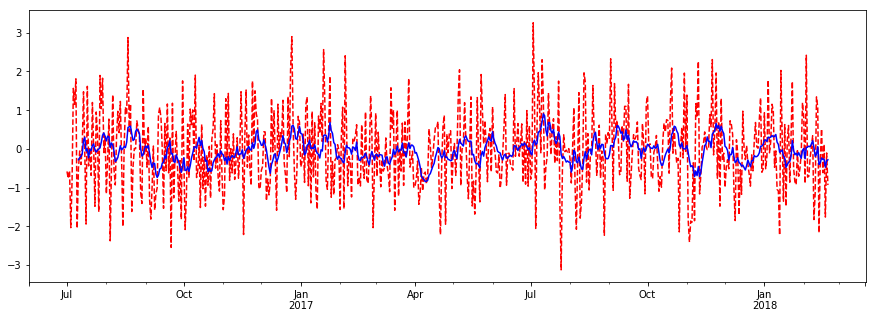

In [42]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,5))
df.plot(style='r--')
df.rolling(window=10).mean().plot(style='b')